# Time series Analysis -Exchange Rate

In [ ]:
import pandas as pd
import  matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:


# Load the dataset
data = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')
print(data.head())
print(data.isnull().sum())

                  Ex_rate
date                     
01-01-1990 00:00   0.7855
02-01-1990 00:00   0.7818
03-01-1990 00:00   0.7867
04-01-1990 00:00   0.7860
05-01-1990 00:00   0.7849
Ex_rate    0
dtype: int64


# EDA

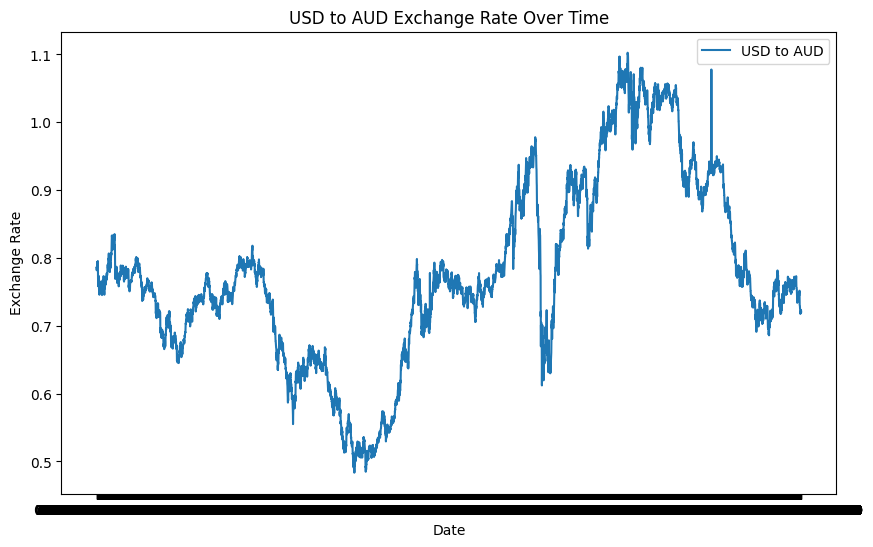

In [6]:

#ploting graphs
plt.figure(figsize=(10, 6))
plt.plot(data['Ex_rate'], label='USD to AUD')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

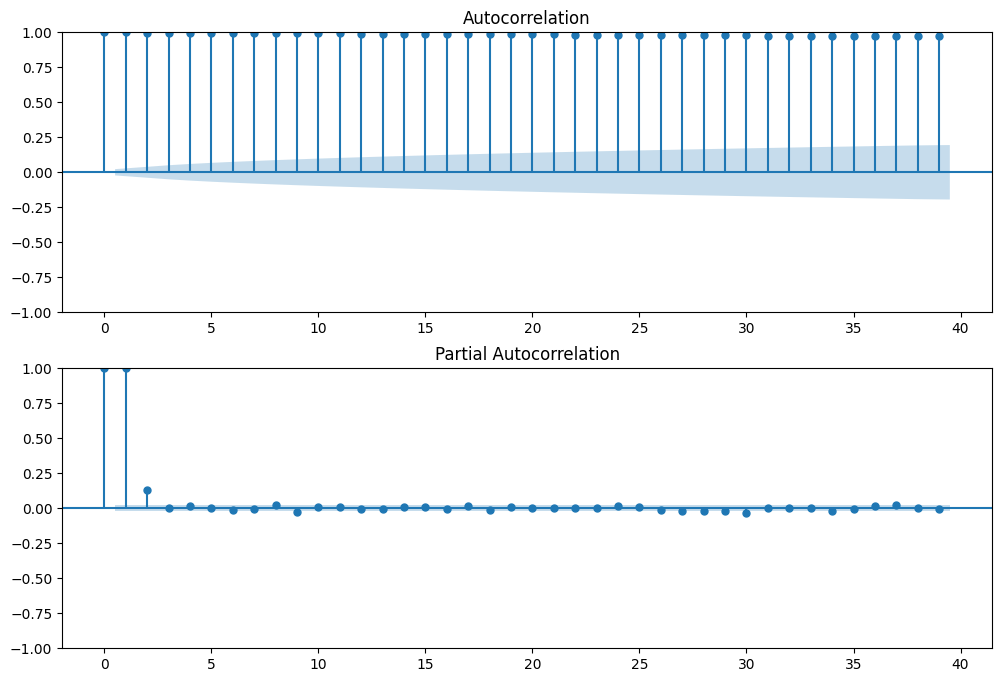

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data['Ex_rate'], ax=ax[0])
plot_pacf(data['Ex_rate'], ax=ax[1])
plt.show()

# Part 2: Model Building - ARIMA

In [13]:
model = ARIMA(data['Ex_rate'], order=(5, 1, 0))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(5, 1, 0)   Log Likelihood               28055.685
Date:                Mon, 08 Jul 2024   AIC                         -56099.370
Time:                        13:55:03   BIC                         -56057.765
Sample:                             0   HQIC                        -56085.091
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -63.382      0.000      -0.135      -0.127
ar.L2         -0.0025      0.006     -0.406      0.685      -0.015       0.010
ar.L3         -0.0167      0.007     -2.452      0.0

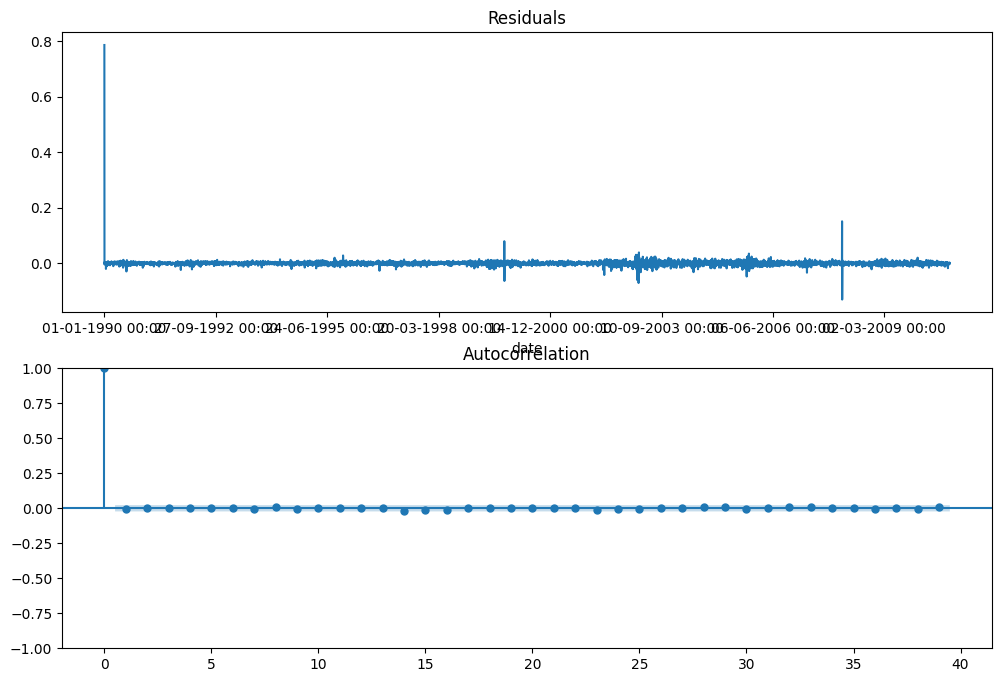

In [14]:
residuals = results.resid
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
residuals.plot(title="Residuals", ax=ax[0])
plot_acf(residuals, ax=ax[1])
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


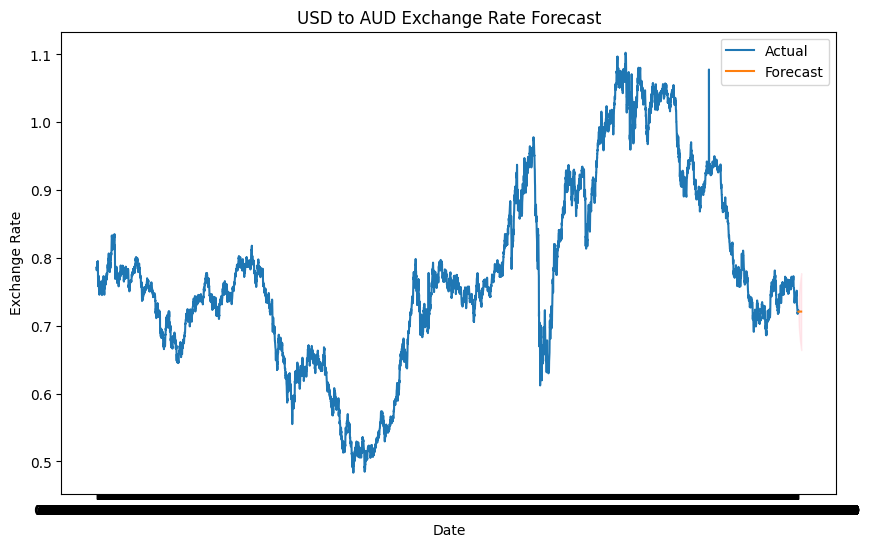

In [15]:
forecast = results.get_forecast(steps=30)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Ex_rate'], label='Actual')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('USD to AUD Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Part 3: Model Building - Exponential Smoothing

In [16]:

model = ExponentialSmoothing(data['Ex_rate'], seasonal='add', seasonal_periods=12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [17]:
results_exp = model.fit()
print(results_exp.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77628.560
Trend:                             None   BIC                         -77531.480
Seasonal:                      Additive   AICC                        -77628.488
Seasonal Periods:                    12   Date:                 Mon, 08 Jul 2024
Box-Cox:                          False   Time:                         13:58:47
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8698356                alpha                 True
smoothing_seasonal       

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


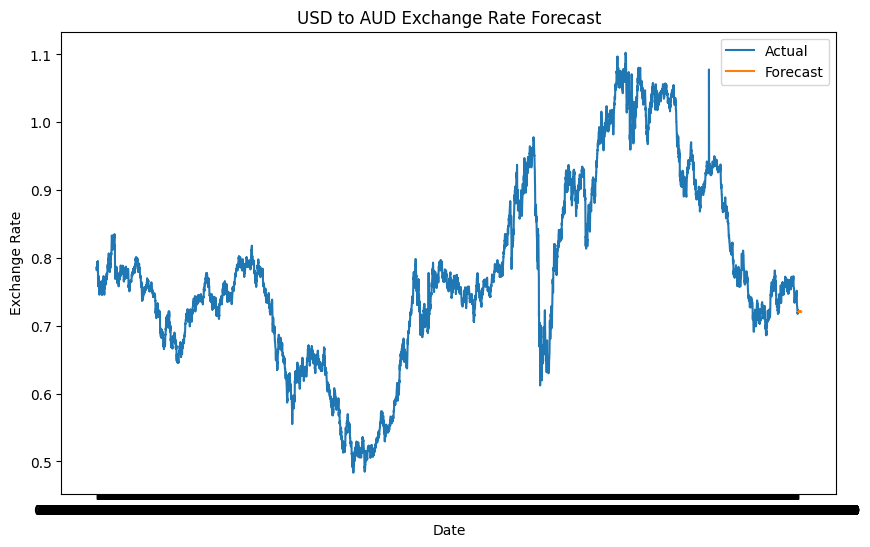

In [18]:
forecast_exp = results_exp.forecast(steps=30)

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Ex_rate'], label='Actual')
plt.plot(forecast_exp.index, forecast_exp, label='Forecast')
plt.title('USD to AUD Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Part 4: Evaluation and Comparison

In [19]:


# ARIMA forecast
forecast_arima = results.get_forecast(steps=30).predicted_mean

# Exponential Smoothing forecast
forecast_exp = results_exp.forecast(steps=30)

# Calculate MAE, RMSE, and MAPE for ARIMA model
mae_arima = mean_absolute_error(data['Ex_rate'][-30:], forecast_arima)
rmse_arima = mean_squared_error(data['Ex_rate'][-30:], forecast_arima, squared=False)
mape_arima = (abs(data['Ex_rate'][-30:] - forecast_arima) / data['Ex_rate'][-30:]).mean() * 100

# Calculate MAE, RMSE, and MAPE for Exponential Smoothing model
mae_exp = mean_absolute_error(data['Ex_rate'][-30:], forecast_exp)
rmse_exp = mean_squared_error(data['Ex_rate'][-30:], forecast_exp, squared=False)
mape_exp = (abs(data['Ex_rate'][-30:] - forecast_exp) / data['Ex_rate'][-30:]).mean() * 100

print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}")
print(f"Exponential Smoothing - MAE: {mae_exp}, RMSE: {rmse_exp}, MAPE: {mape_exp}")


ARIMA - MAE: 0.012705833760662252, RMSE: 0.016955344463566734, MAPE: nan
Exponential Smoothing - MAE: 0.012893873162132911, RMSE: 0.017130676033911125, MAPE: nan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
